<a href="https://colab.research.google.com/github/taylor-coleman/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# Importing pandas
import pandas as pd

In [11]:
# Loading in data cleaning it along with printing the head and shape
df_credit = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data", header=None, na_values="?")
print(df_credit.shape)
df_credit.head(20)

(690, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [12]:
# Looking at nan values
df_credit.isna().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [19]:
# Dropping the nan values
df = df_credit.dropna()
df.isna().sum()
df.shape

(653, 16)

In [20]:
# Looking at each attribute data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
0     653 non-null object
1     653 non-null float64
2     653 non-null float64
3     653 non-null object
4     653 non-null object
5     653 non-null object
6     653 non-null object
7     653 non-null float64
8     653 non-null object
9     653 non-null object
10    653 non-null int64
11    653 non-null object
12    653 non-null object
13    653 non-null float64
14    653 non-null int64
15    653 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.7+ KB


In [22]:
# Chaning the ints to floats so now we have all continous values as floats to a toal of 6
df[[10]] = df[[10]].astype('float64')
df[[14]] = df[[14]].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
0     653 non-null object
1     653 non-null float64
2     653 non-null float64
3     653 non-null object
4     653 non-null object
5     653 non-null object
6     653 non-null object
7     653 non-null float64
8     653 non-null object
9     653 non-null object
10    653 non-null float64
11    653 non-null object
12    653 non-null object
13    653 non-null float64
14    653 non-null float64
15    653 non-null object
dtypes: float64(6), object(10)
memory usage: 86.7+ KB


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [24]:
# Looking at the descrpitive stats for the numeric attributes
df.describe()

,1,2,7,10,13,14
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000


In [31]:
# Looking at the correlation between the numeric attributes
df.corr()

,1,2,7,10,13,14
1,1.000000,0.217681,0.417647,0.198153,-0.084618,0.029078
2,0.217681,1.000000,0.300600,0.269834,-0.217076,0.119754
7,0.417647,0.300600,1.000000,0.327325,-0.064781,0.052159
10,0.198153,0.269834,0.327325,1.000000,-0.116101,0.058408
13,-0.084618,-0.217076,-0.064781,-0.116101,1.000000,0.073384
14,0.029078,0.119754,0.052159,0.058408,0.073384,1.000000


In [48]:
# Chaning the + and - to values and plitting the data frames from accepted and denied applications
df[15] = df.loc[:,15].replace('+',1).replace('-',0)
approved = df.loc[df[15] == 1]
denied = df.loc[df[15] == 0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
# Looking at approveds head
approved.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,1


In [50]:
# Looking at denieds head

denied.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
70,b,32.33,7.50,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,0
72,a,38.58,5.00,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,0
73,b,44.25,0.50,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,0
74,b,44.83,7.00,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,0
75,b,20.67,5.29,u,g,q,v,0.375,t,t,1.0,f,g,160.0,0.0,0


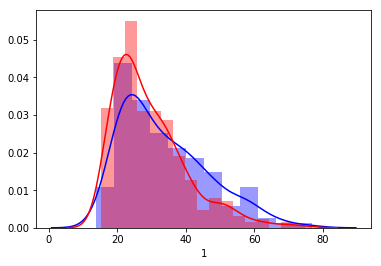

In [52]:
import seaborn as sns

sns.distplot(approved[1], color='b')
sns.distplot(denied[1], color='r');

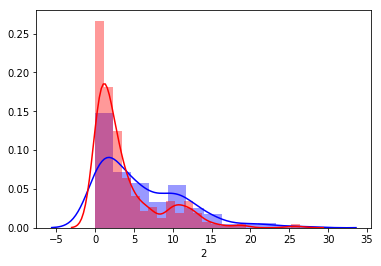

In [53]:
sns.distplot(approved[2], color='b')
sns.distplot(denied[2], color='r');

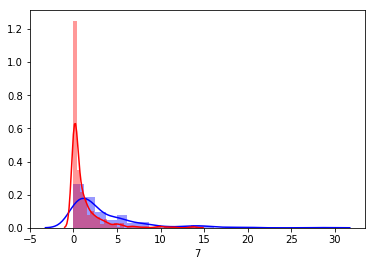

In [54]:
sns.distplot(approved[7], color='b')
sns.distplot(denied[7], color='r');

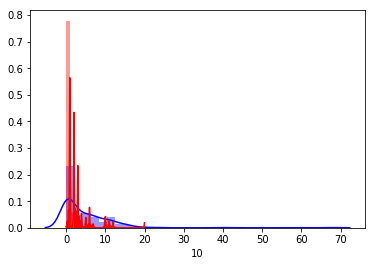

In [55]:
sns.distplot(approved[10], color='b')
sns.distplot(denied[10], color='r');

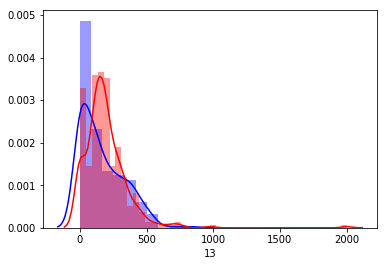

In [56]:
sns.distplot(approved[13], color='b')
sns.distplot(denied[13], color='r');

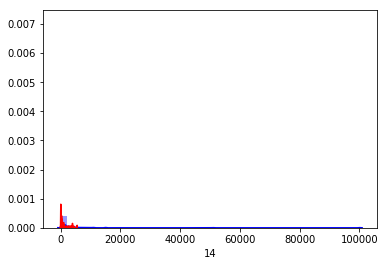

In [57]:
sns.distplot(approved[14], color='b')
sns.distplot(denied[14], color='r');

In [0]:
# Function to run ttest on the accepted and denied dfs
from scipy import stats

def ttest(approved, denied):
  cols = [1,2,7,10,13,14]
  for col in cols:
    print('Column ' + str(col) + ' t statistic and p value')
    print('approved Mean: ' + str(approved[col].mean()))
    print('senied Mean: ' + str(denied[col].mean()))
    tstat, pval = stats.ttest_ind(approved[col], denied[col])
    print('t statistic: ' + str(tstat))
    print('p value: ' + str(pval))
    print('------------'*3)

In [83]:
ttest(approved, denied)

Column 1 t statistic and p value
approved Mean: 33.84547297297298
senied Mean: 29.562268907563023
t statistic: 4.675662433767456
p value: 3.5636710933835225e-06
------------------------------------
Column 2 t statistic and p value
approved Mean: 5.971942567567565
senied Mean: 3.882324929971988
t statistic: 5.400813416576192
p value: 9.310154396147606e-08
------------------------------------
Column 7 t statistic and p value
approved Mean: 3.47518581081081
senied Mean: 1.2237254901960788
t statistic: 9.002392498622463
p value: 2.4079238505859142e-18
------------------------------------
Column 10 t statistic and p value
approved Mean: 4.716216216216216
senied Mean: 0.6666666666666666
t statistic: 11.336964562239809
p value: 2.5864649620278843e-27
------------------------------------
Column 13 t statistic and p value
approved Mean: 164.6216216216216
senied Mean: 193.40896358543418
t statistic: -2.18221936438708
p value: 0.029450100409286473
------------------------------------
Column 14 t 

In [91]:
pd.crosstab(df[15], df[1],normalize='columns')

1,13.75,15.17,15.75,15.83,15.92,16.0,16.08,16.17,16.25,16.33,16.5,16.92,17.08,17.25,17.33,17.42,17.5,17.58,17.67,17.83,17.92,18.0,18.08,18.17,18.25,18.33,18.42,18.5,18.58,18.67,18.83,18.92,19.0,19.17,19.33,19.42,19.5,19.58,19.67,19.75,...,53.33,53.92,54.33,54.42,54.58,54.83,55.75,55.92,56.0,56.42,56.5,56.58,56.75,56.83,57.08,57.42,57.58,57.83,58.33,58.42,58.58,58.67,59.5,59.67,60.08,60.58,60.92,62.5,62.75,63.33,64.08,65.17,65.42,67.75,68.67,69.17,69.5,73.42,74.83,76.75
15,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,1.0,0.5,1.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.5,1.0,0.0,1.0,0.0,0.333333,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,0.0,1.0,0.5,0.5,0.666667,1.0,1.0,0.333333,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.5,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.5,1.0,0.0,0.0,0.5,1.0,0.0,0.5,0.5,0.333333,0.0,0.0,0.666667,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.5,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [92]:
pd.crosstab(df[15], df[4],normalize='columns')

4,g,gg,p
15,,,
0,0.501002,0.0,0.703947
1,0.498998,1.0,0.296053


In [93]:
pd.crosstab(df[15], df[5],normalize='columns')

5,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x
15,,,,,,,,,,,,,,
0,0.634615,0.548872,0.275,0.730769,0.416667,0.86,0.745455,0.7,0.729167,0.578947,0.346667,0.333333,0.47619,0.166667
1,0.365385,0.451128,0.725,0.269231,0.583333,0.14,0.254545,0.3,0.270833,0.421053,0.653333,0.666667,0.52381,0.833333


In [94]:
pd.crosstab(df[15], df[6],normalize='columns')

6,bb,dd,ff,h,j,n,o,v,z
15,,,,,,,,,
0,0.54717,0.666667,0.851852,0.364964,0.625,0.5,0.5,0.572178,0.25
1,0.45283,0.333333,0.148148,0.635036,0.375,0.5,0.5,0.427822,0.75


In [95]:
pd.crosstab(df[15], df[7],normalize='columns')

7,0.0,0.04,0.085,0.125,0.165,0.21,0.25,0.29,0.335,0.375,0.415,0.455,0.46,0.5,0.54,0.585,0.625,0.665,0.71,0.75,0.79,0.795,0.835,0.875,0.96,1.0,1.04,1.085,1.165,1.21,1.25,1.29,1.335,1.375,1.415,1.46,1.5,1.54,1.585,1.625,...,5.5,5.665,5.75,6.0,6.04,6.29,6.5,6.75,7.0,7.375,7.415,7.5,7.585,7.875,7.96,8.0,8.29,8.5,8.625,8.665,9.0,9.46,10.0,10.75,11.0,11.5,12.5,12.75,13.0,13.5,13.875,14.0,14.415,15.0,15.5,16.0,17.5,18.0,20.0,28.5
15,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.766667,0.59375,0.791667,0.827586,0.9,0.666667,0.78125,0.75,0.8,0.571429,0.75,1.0,0.0,0.814815,0.8,0.833333,0.0,0.666667,0.0,0.5,1.0,1.0,0.25,0.5,0.5,0.733333,0.0,0.333333,1.0,0.0,0.6,0.333333,0.0,0.5,0.0,0.0,0.541667,0.0,0.6,0.2,...,0.285714,0.0,0.5,0.0,0.0,0.0,0.2,1.0,0.25,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.233333,0.40625,0.208333,0.172414,0.1,0.333333,0.21875,0.25,0.2,0.428571,0.25,0.0,1.0,0.185185,0.2,0.166667,1.0,0.333333,1.0,0.5,0.0,0.0,0.75,0.5,0.5,0.266667,1.0,0.666667,0.0,1.0,0.4,0.666667,1.0,0.5,1.0,1.0,0.458333,1.0,0.4,0.8,...,0.714286,1.0,0.5,1.0,1.0,1.0,0.8,0.0,0.75,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.6,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [96]:
pd.crosstab(df[15], df[9],normalize='columns')

9,f,t
15,,
0,0.745902,0.292683
1,0.254098,0.707317


In [97]:
pd.crosstab(df[15], df[10],normalize='columns')

10,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,23.0,40.0,67.0
15,,,,,,,,,,,,,,,,,,,,,,,
0,0.745902,0.521739,0.571429,0.296296,0.2,0.117647,0.136364,0.0625,0.0,0.0,0.5,0.052632,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
1,0.254098,0.478261,0.428571,0.703704,0.8,0.882353,0.863636,0.9375,1.0,1.0,0.5,0.947368,0.875,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0


In [98]:
pd.crosstab(df[15], df[12],normalize='columns')

12,g,p,s
15,,,
0,0.531773,0.5,0.716981
1,0.468227,0.5,0.283019


In [99]:
pd.crosstab(df[15], df[13],normalize='columns')

13,0.0,17.0,20.0,21.0,22.0,24.0,28.0,29.0,30.0,32.0,40.0,43.0,45.0,49.0,50.0,52.0,56.0,60.0,62.0,70.0,73.0,75.0,76.0,80.0,86.0,88.0,92.0,93.0,94.0,96.0,99.0,100.0,102.0,108.0,110.0,112.0,117.0,120.0,121.0,128.0,...,396.0,399.0,400.0,408.0,410.0,416.0,420.0,422.0,431.0,432.0,434.0,440.0,443.0,450.0,454.0,455.0,460.0,465.0,470.0,480.0,487.0,491.0,500.0,510.0,515.0,519.0,520.0,523.0,550.0,560.0,583.0,600.0,640.0,680.0,711.0,720.0,760.0,840.0,980.0,2000.0
15,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.375,1.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.25,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.25,1.0,1.0,1.0,0.448276,1.0,0.0,0.5,0.0,1.0,0.333333,0.0,0.533333,0.0,0.75,0.5,1.0,0.0,0.657143,0.0,0.666667,...,0.0,0.0,0.666667,0.0,0.0,1.0,0.75,0.0,0.0,0.0,0.0,0.5,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.25,1.0,1.0,0.5,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,0.625,0.0,0.5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.75,1.0,0.0,1.0,1.0,1.0,1.0,0.666667,0.0,0.75,0.0,0.0,0.0,0.551724,0.0,1.0,0.5,1.0,0.0,0.666667,1.0,0.466667,1.0,0.25,0.5,0.0,1.0,0.342857,1.0,0.333333,...,1.0,1.0,0.333333,1.0,1.0,0.0,0.25,1.0,1.0,1.0,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,0.75,0.0,0.0,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [0]:
# Function to run the chi squared test on categorical columns
def chi_squared_test(df):
  cols = [1,4,5,6,7,9,10,12,13]
  for col in cols:
    chi2, pval, dof, expt = stats.chi2_contingency(pd.crosstab(df[15], df[col]))
    print(col)
    print('Chi-squared: {}'.format(chi2))
    print('P-value: {}'.format(pval))
    print('DoF: {}'.format(dof))
    print('Expected: {}'.format(expt))
    print('------------'*3)

In [106]:
# Running the chi squared test
chi_squared_test(df)

1
Chi-squared: 371.1852262451527
P-value: 0.11040233414461242
DoF: 339
Expected: [[0.5467075  0.5467075  0.5467075  1.09341501 0.5467075  1.09341501
  1.09341501 0.5467075  1.09341501 1.64012251 1.09341501 1.09341501
  1.64012251 0.5467075  0.5467075  0.5467075  0.5467075  1.09341501
  1.09341501 0.5467075  1.64012251 0.5467075  1.64012251 1.64012251
  1.09341501 0.5467075  1.09341501 0.5467075  1.64012251 0.5467075
  3.28024502 1.09341501 1.09341501 3.28024502 1.09341501 1.64012251
  1.64012251 1.64012251 1.64012251 0.5467075  2.18683002 1.09341501
  1.64012251 0.5467075  0.5467075  2.73353752 1.64012251 3.28024502
  2.18683002 1.64012251 1.09341501 1.64012251 1.64012251 1.09341501
  1.09341501 0.5467075  1.64012251 0.5467075  1.09341501 1.09341501
  1.64012251 1.64012251 0.5467075  2.18683002 1.64012251 1.64012251
  0.5467075  1.09341501 3.28024502 1.64012251 4.92036753 1.64012251
  1.09341501 2.18683002 2.73353752 2.73353752 1.09341501 2.73353752
  1.09341501 1.64012251 2.18683002 3

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*